# Approximating the sum of catalan numbers

In combinatorial mathematics, the Catalan numbers are a sequence of natural numbers that occur in various counting problems, often involving recursively defined objects. 

The nth Catalan number can be expressed directly in terms of the central binomial coefficients by

$C_{n}={\frac {1}{n+1}}{2n \choose n}={\frac {(2n)!}{(n+1)!\,n!}}=\prod \limits _{k=2}^{n}{\frac {n+k}{k}}\qquad {\text{for }}n\geq 0.$

An alternative expression for $C_n$ is

$C_{n}={2n \choose n}-{2n \choose n+1}$ for $n \geq 0$ 

In [115]:
import numpy as np
from math import comb, sqrt, pi, e, log, floor
from itertools import accumulate as acc

import matplotlib as mpl
import matplotlib.pyplot as plt

#function that gives the catalan number
from srl.gr import catnum

n=50

#catalan numbers and sum
cat_arr = [catnum(i) for i in range(n)]
sum_arr = list(acc(cat_arr))

print('\nCatalan Numbers:\n', cat_arr)



Catalan Numbers:
 [1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862, 16796, 58786, 208012, 742900, 2674440, 9694845, 35357670, 129644790, 477638700, 1767263190, 6564120420, 24466267020, 91482563640, 343059613650, 1289904147324, 4861946401452, 18367353072152, 69533550916004, 263747951750360, 1002242216651368, 3814986502092304, 14544636039226909, 55534064877048198, 212336130412243110, 812944042149730764, 3116285494907301262, 11959798385860453492, 45950804324621742364, 176733862787006701400, 680425371729975800390, 2622127042276492108820, 10113918591637898134020, 39044429911904443959240, 150853479205085351660700, 583300119592996693088040, 2257117854077248073253720, 8740328711533173390046320, 33868773757191046886429490, 131327898242169365477991900, 509552245179617138054608572]


## There is no closed formula for the sum of Catalan's numbers

$S_n = \sum_{i=0}^n C_i$

Some approximations:

$ 4^n 
> \frac{20 \cdot 4^n}{ 9 n \sqrt{e \pi n}} 
> \frac{4^{(n+1)}}{3 n \sqrt{\pi n}} 
> S_n 
> \frac{4^{(n+1)}}{3(n+1) \sqrt{\pi (n-0.7541)}} 
> \frac{4^{(n+1)}}{3(n+1) \sqrt{\pi n}} 
> \frac{4 C_n}{3}
> 2^n $

A good reference for this problem :

**Kevin Topley**. *Computationally Efficient Bounds for the Sum of Catalan Numbers*. ArXiv. 2016.

$S_n \sim \frac{\frac{4^{(n+1)}}{3 (n+1) \sqrt{\pi n}} + \frac{4^{(n+1)}}{3 n \sqrt{\pi n}}}{2} \sim \frac{4^{(n+1)}}{ (3n+\frac{3}{2}) \sqrt{\pi n}}$

Note:

$n^{3/2} = \sqrt{n^3} = n\sqrt{n}$

$2^{2n} = 4^n$

$2^{(2n+2)} = 4^{(n+1)}$


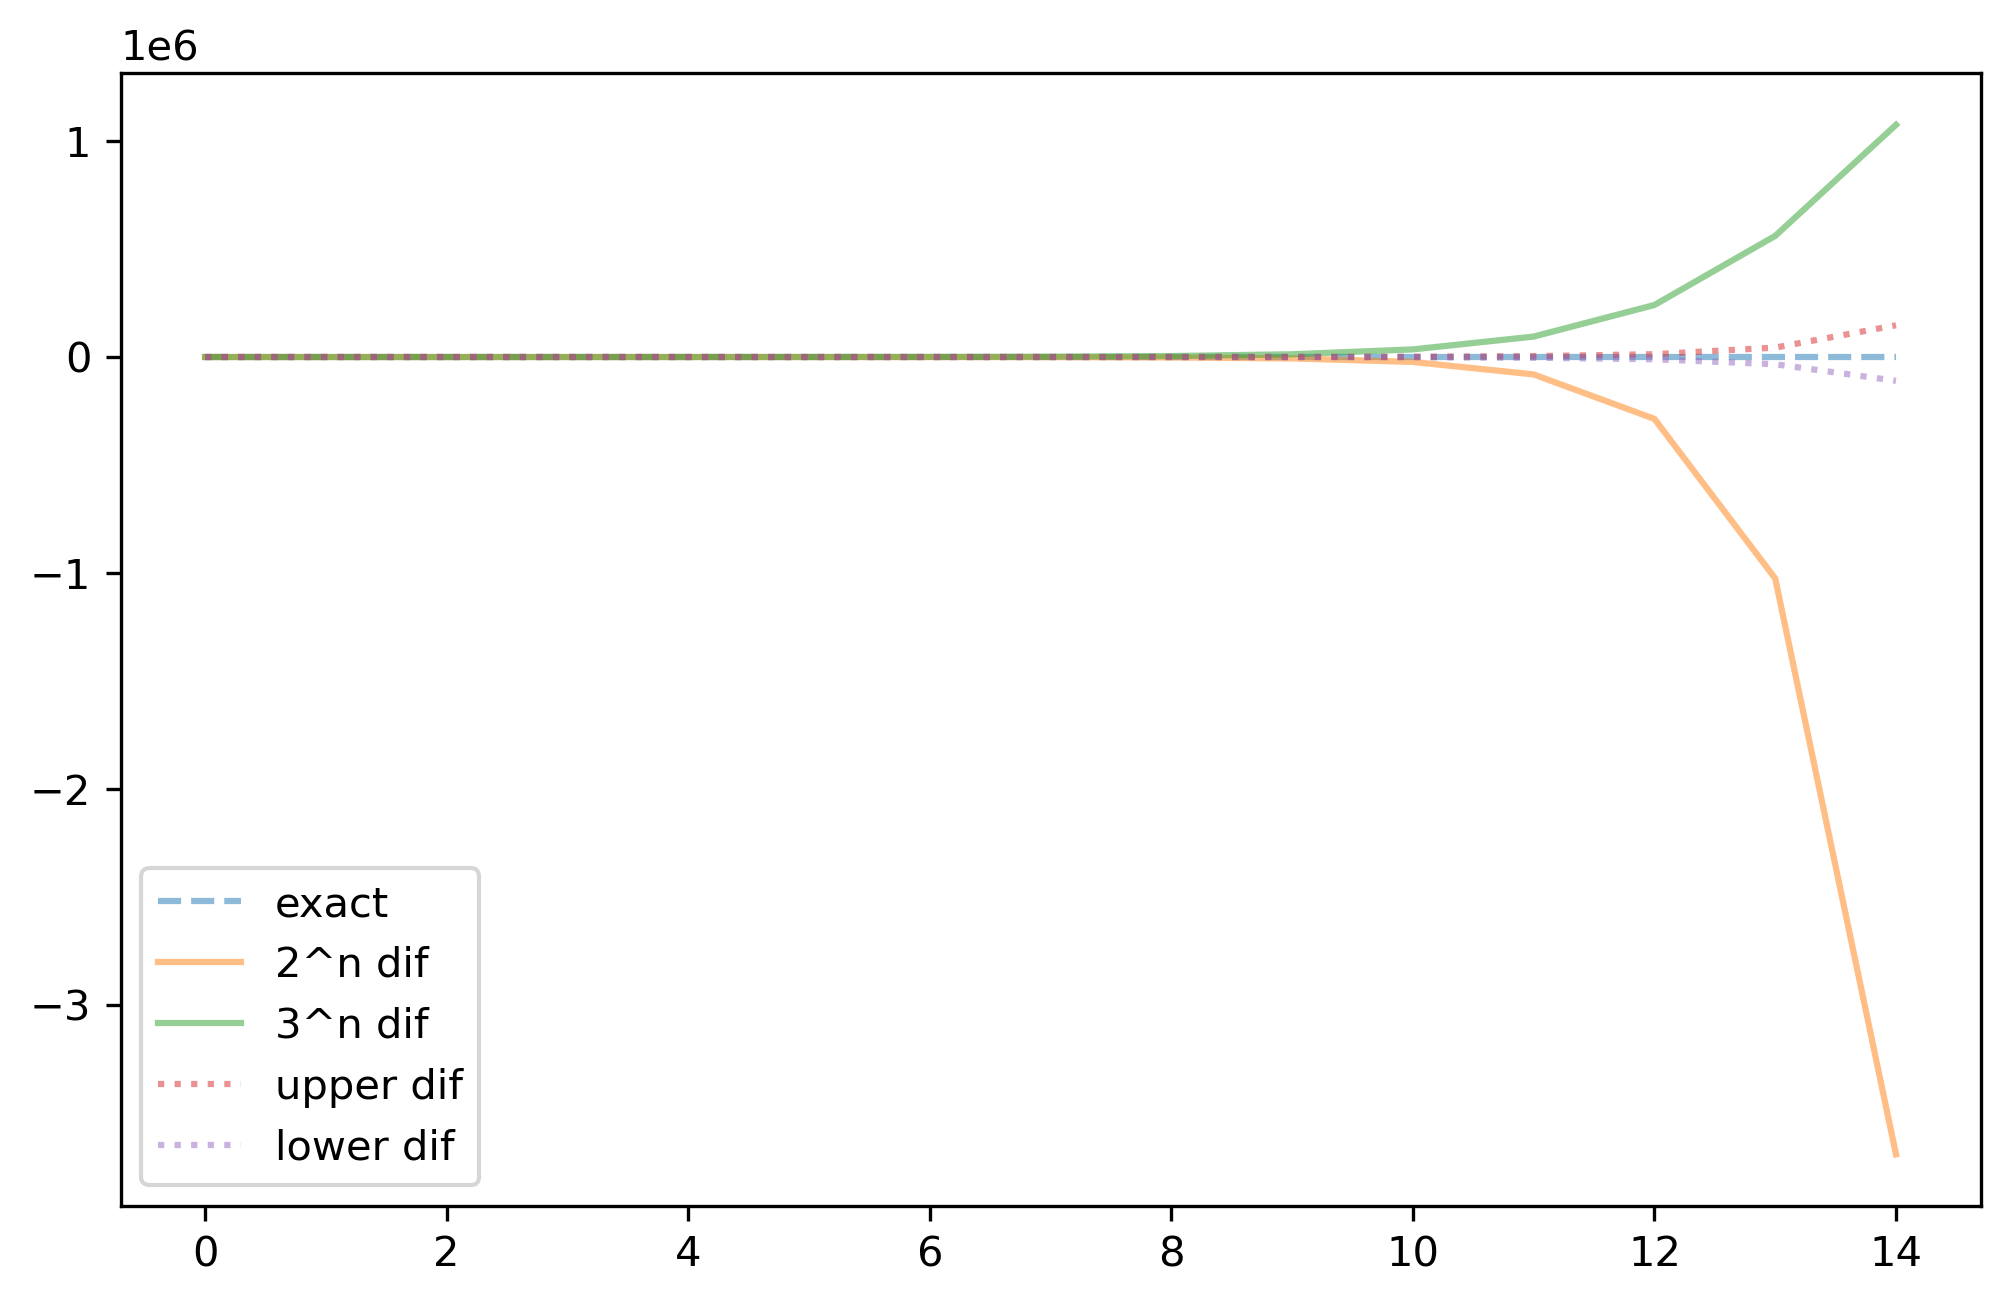

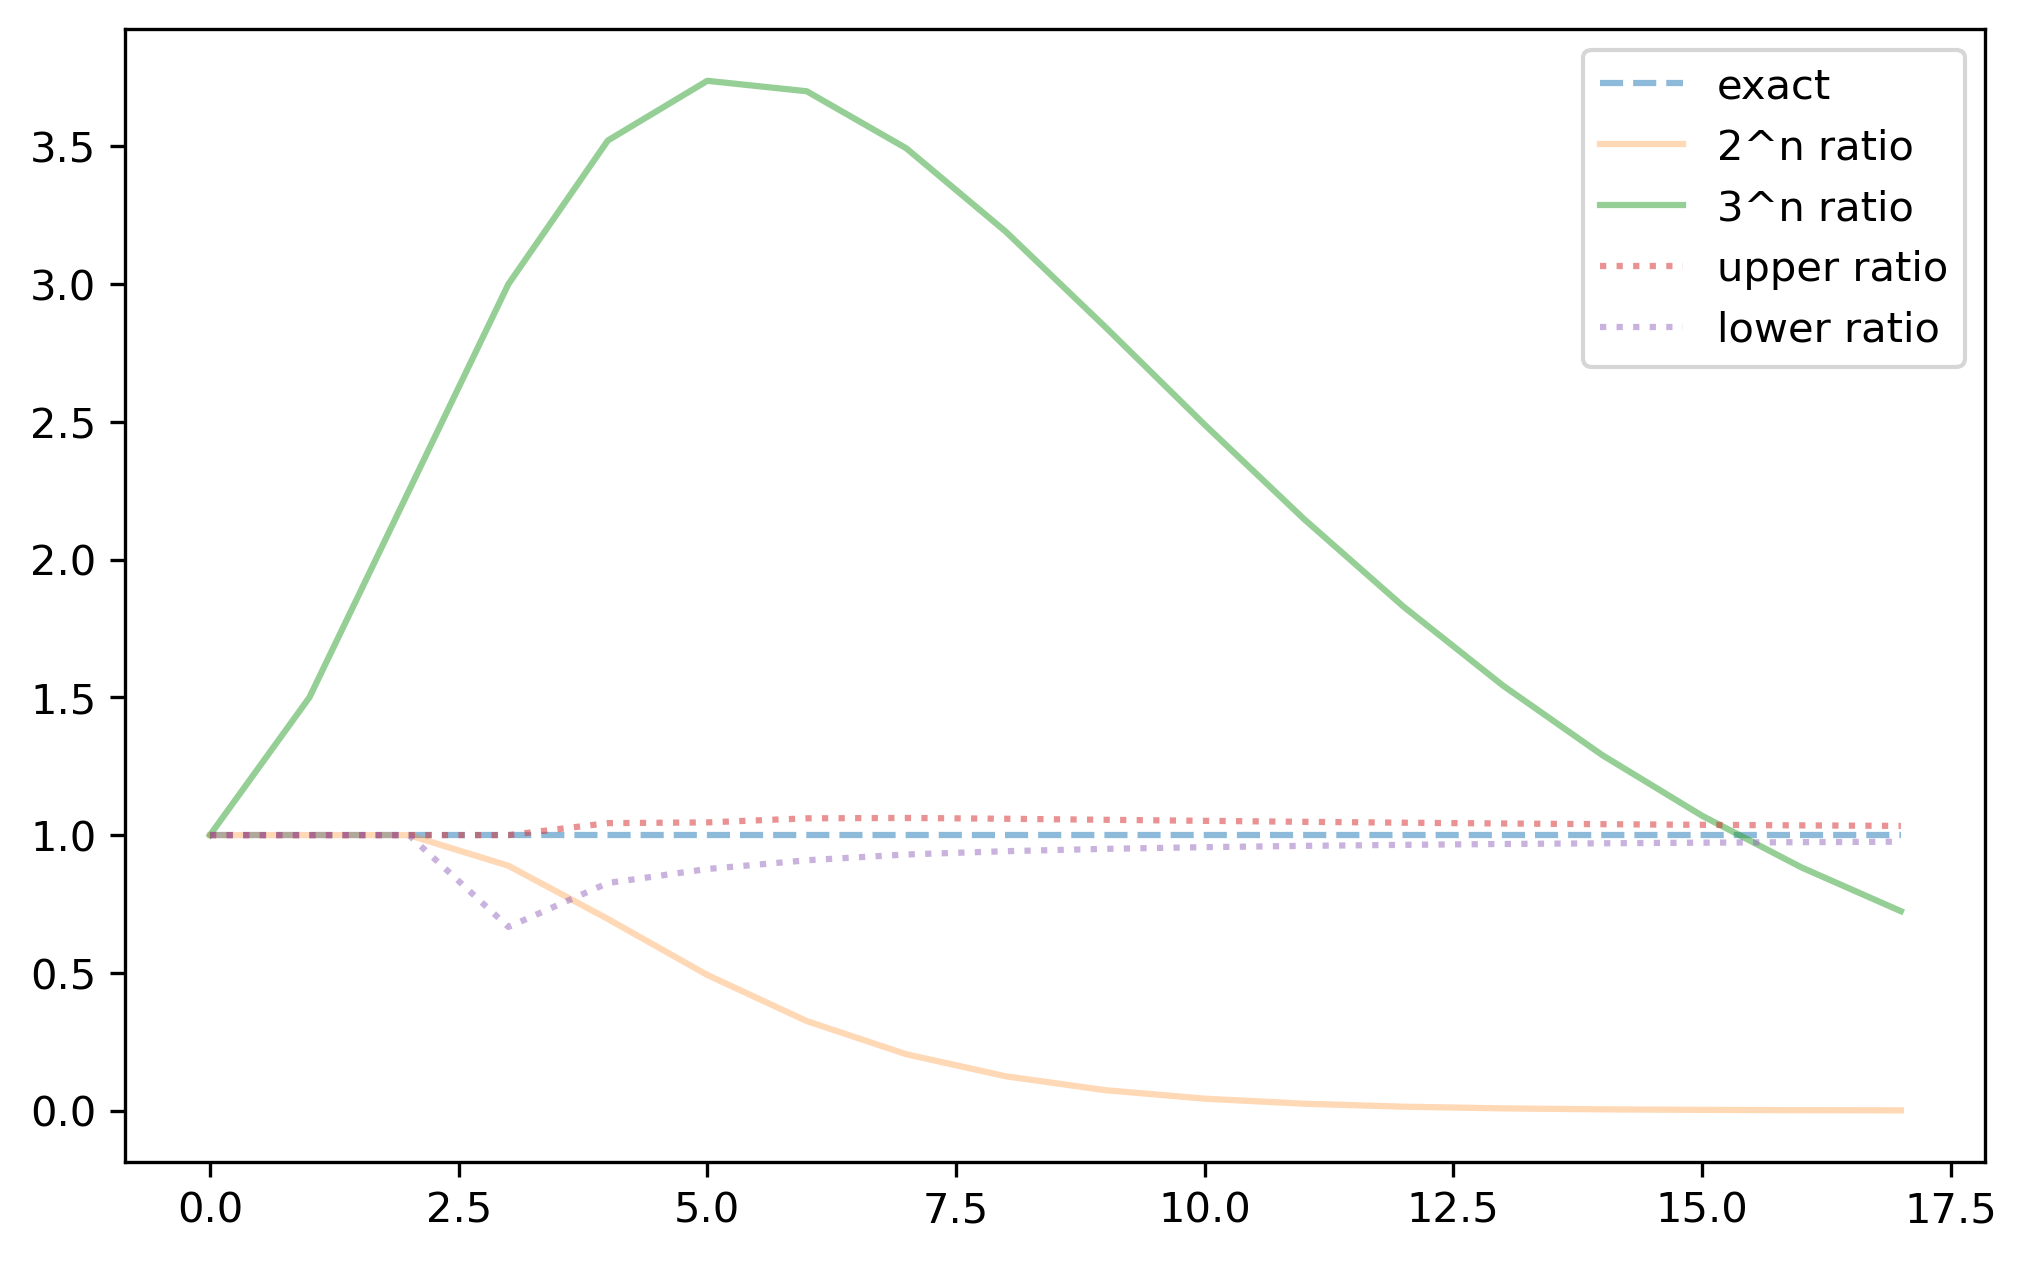

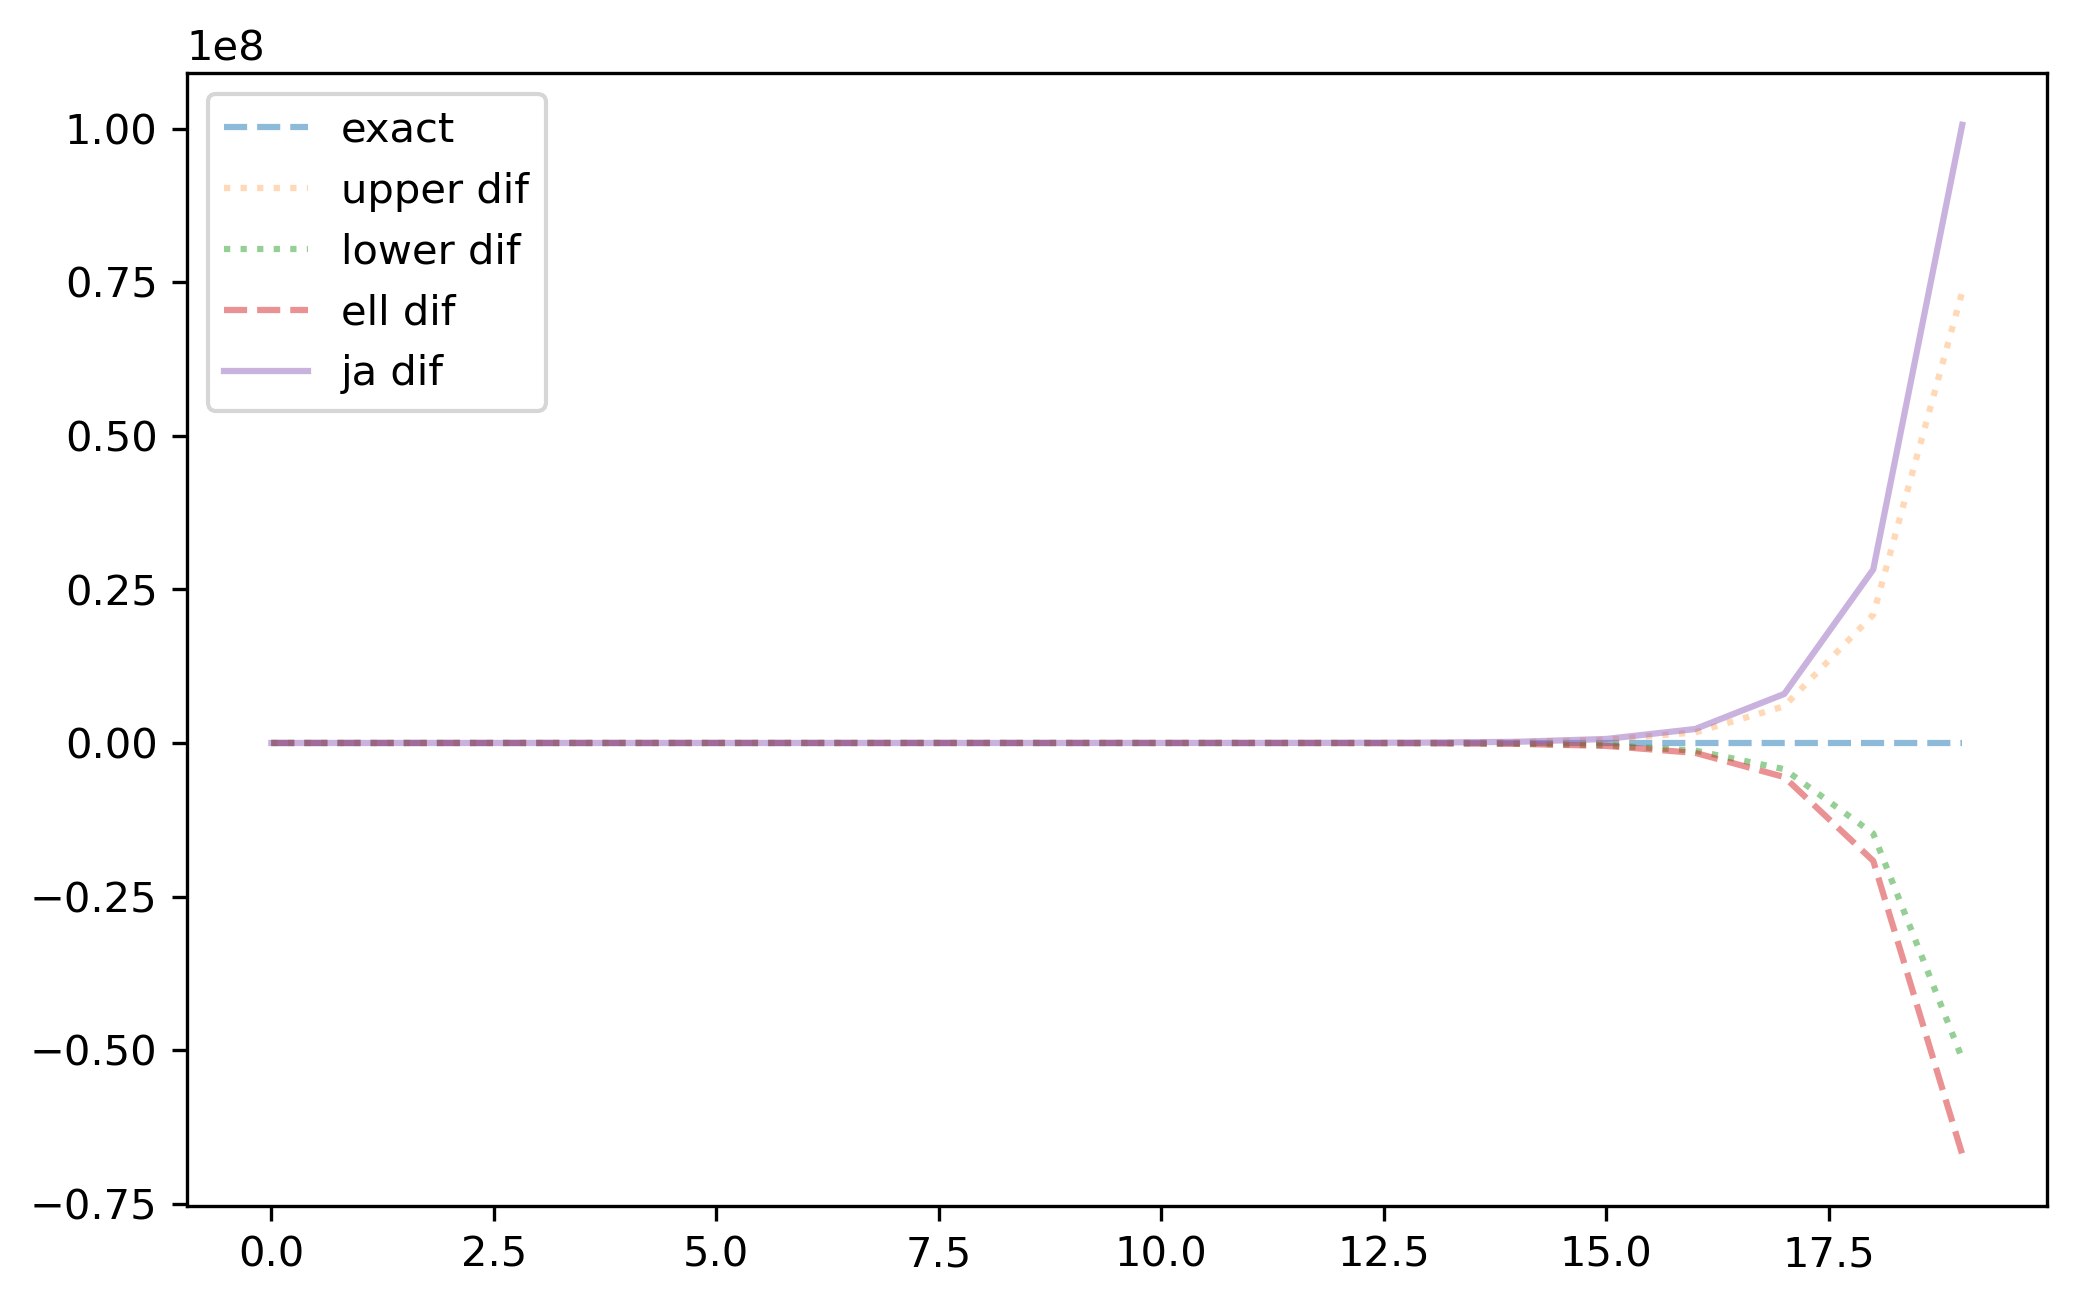

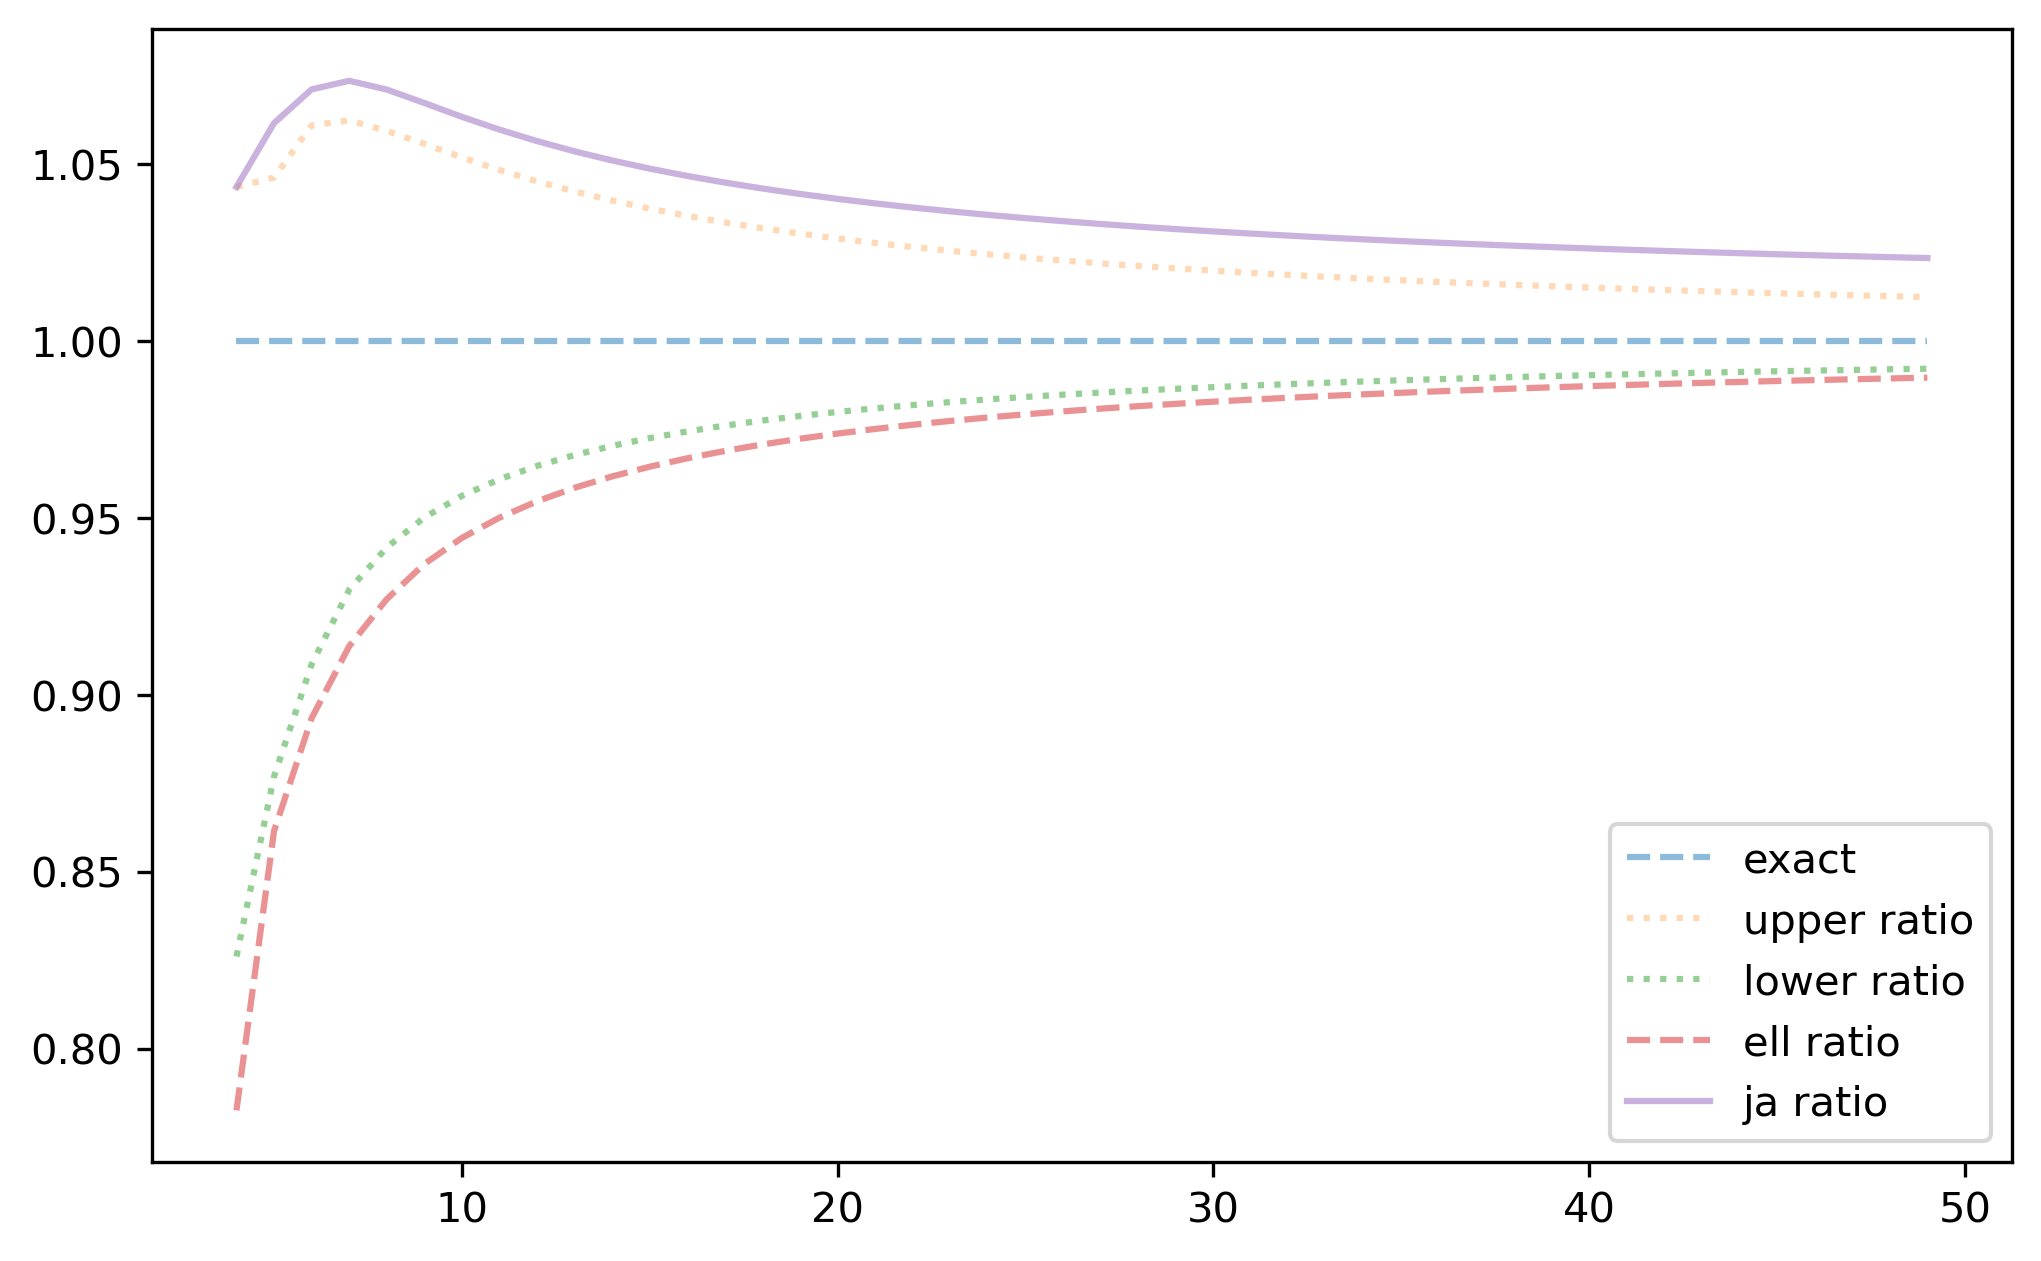

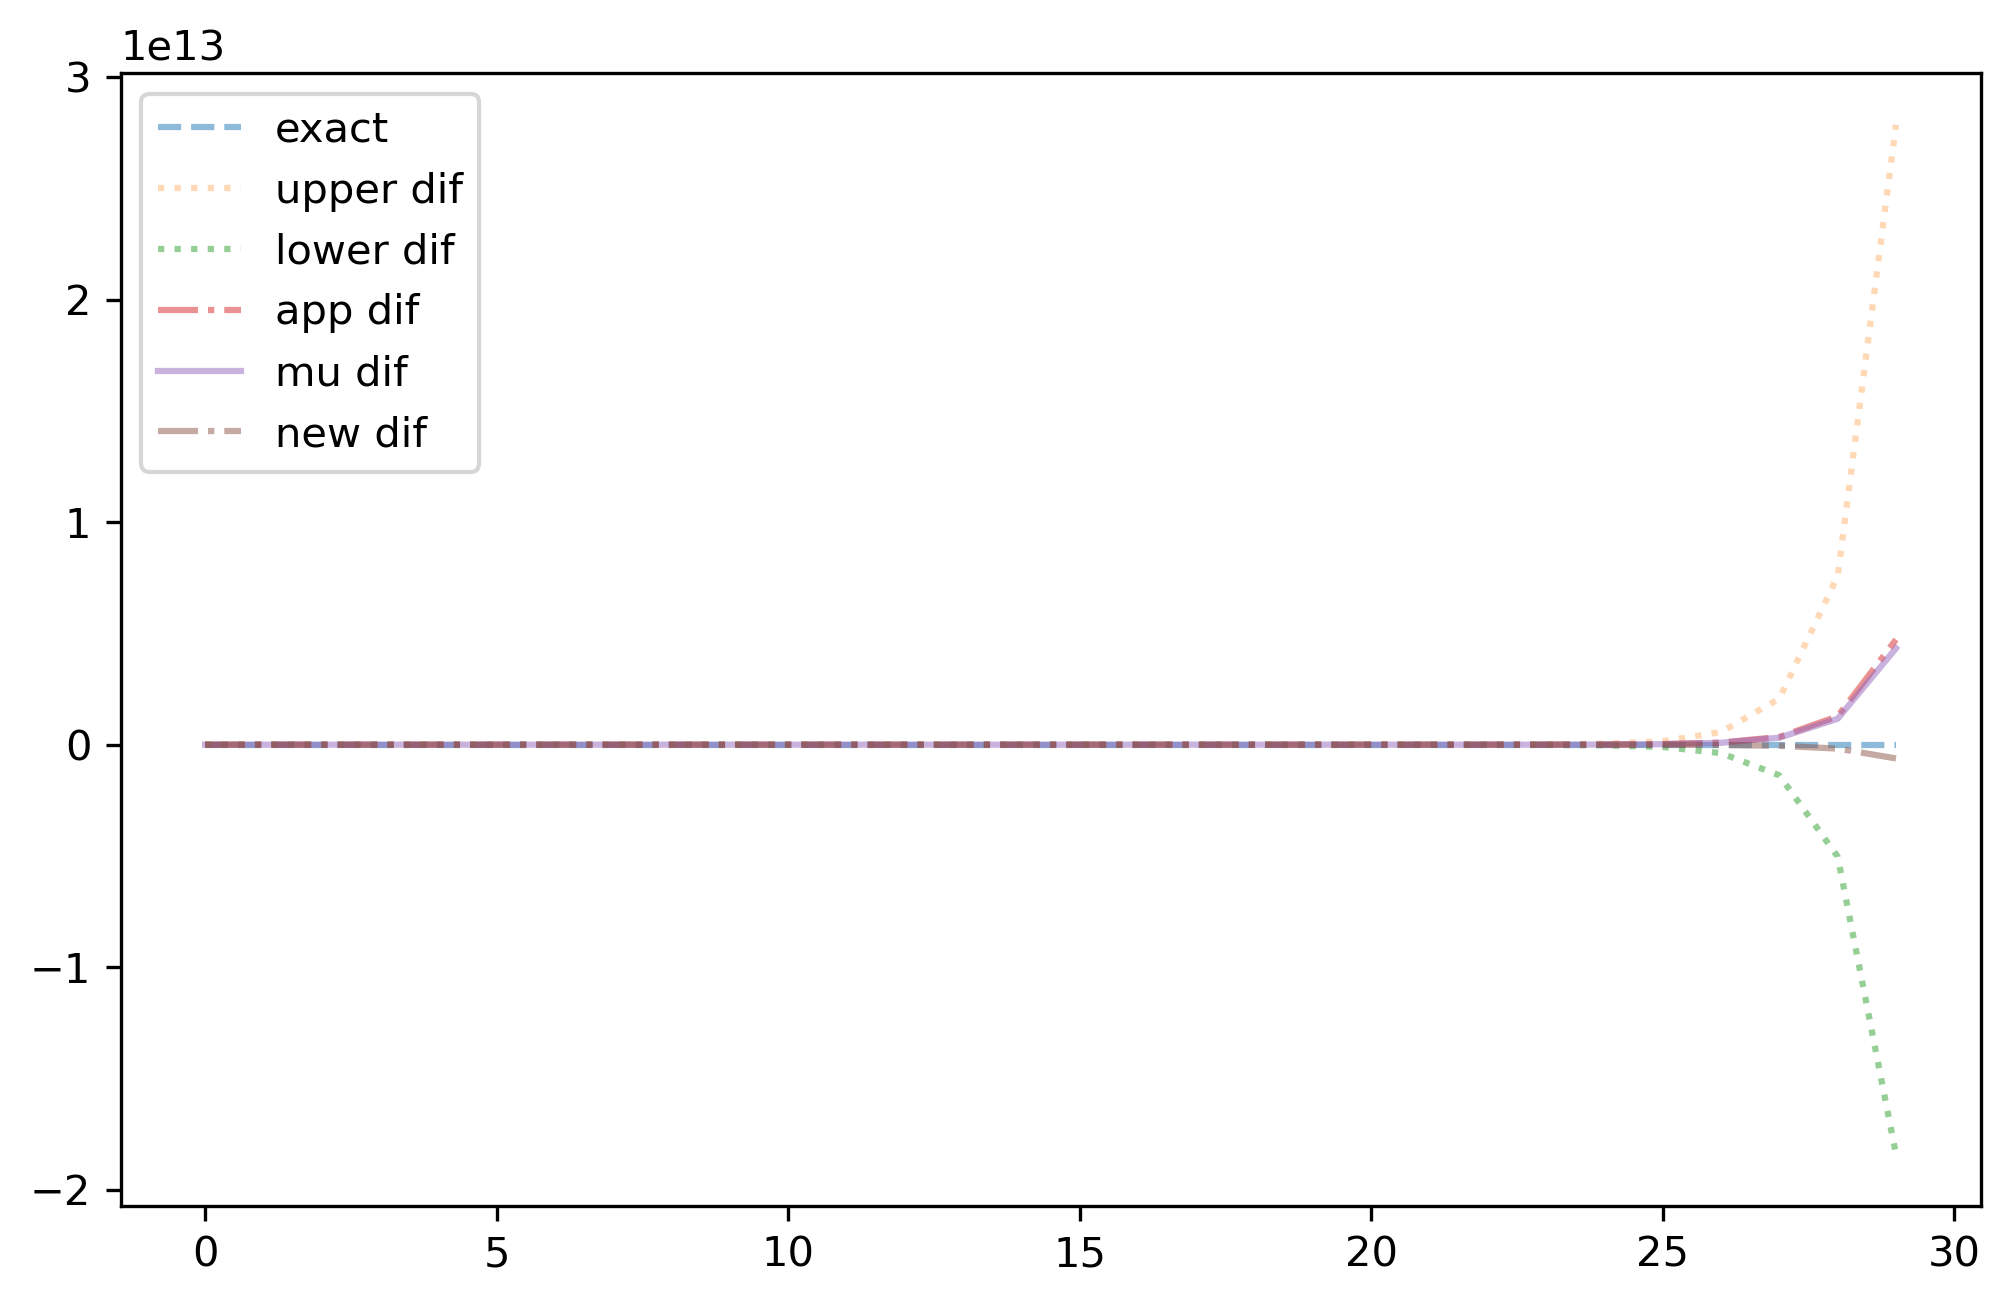

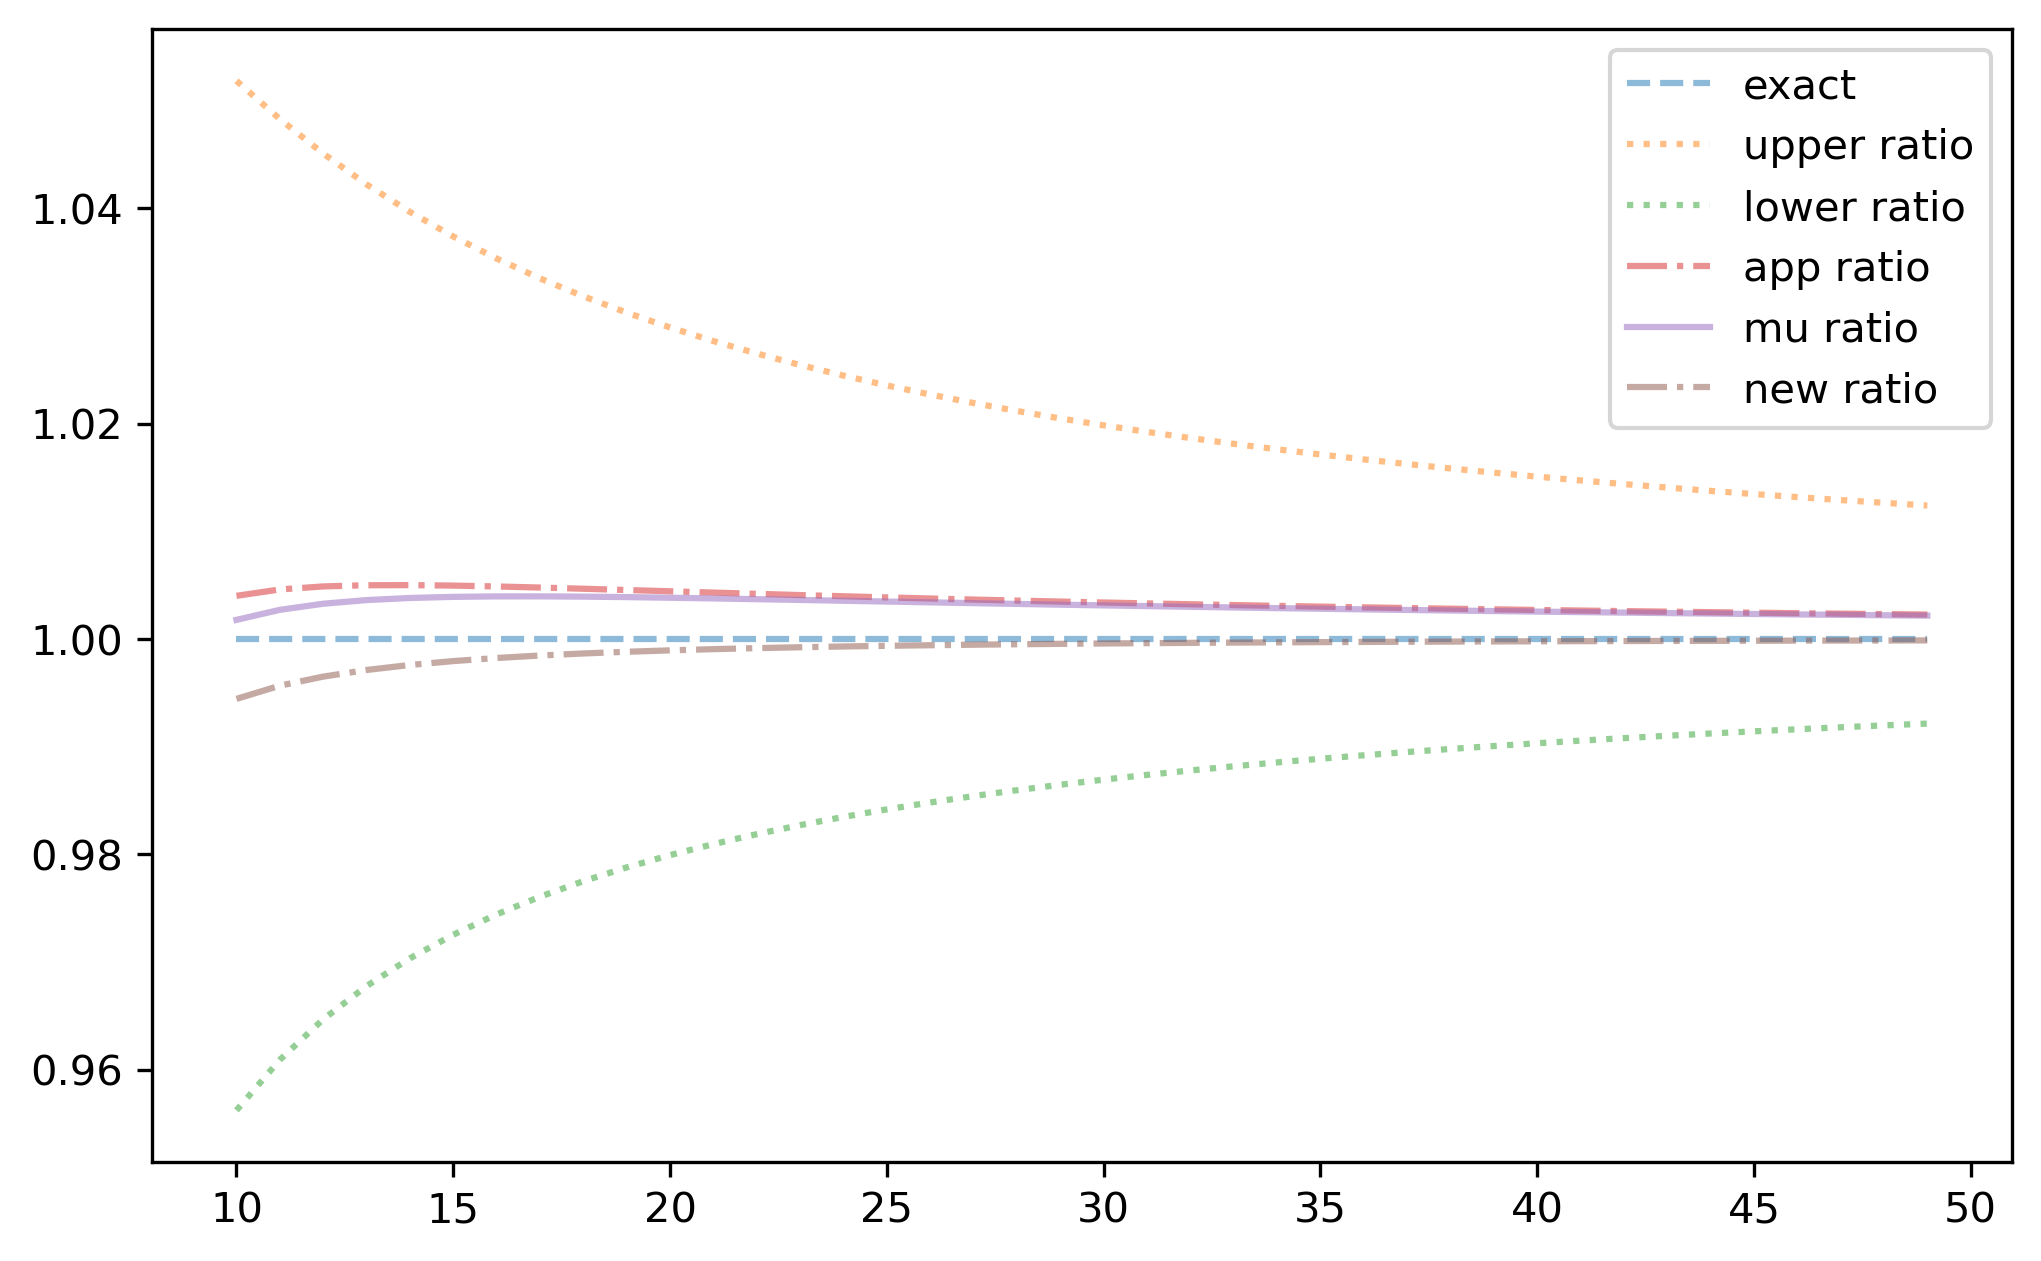

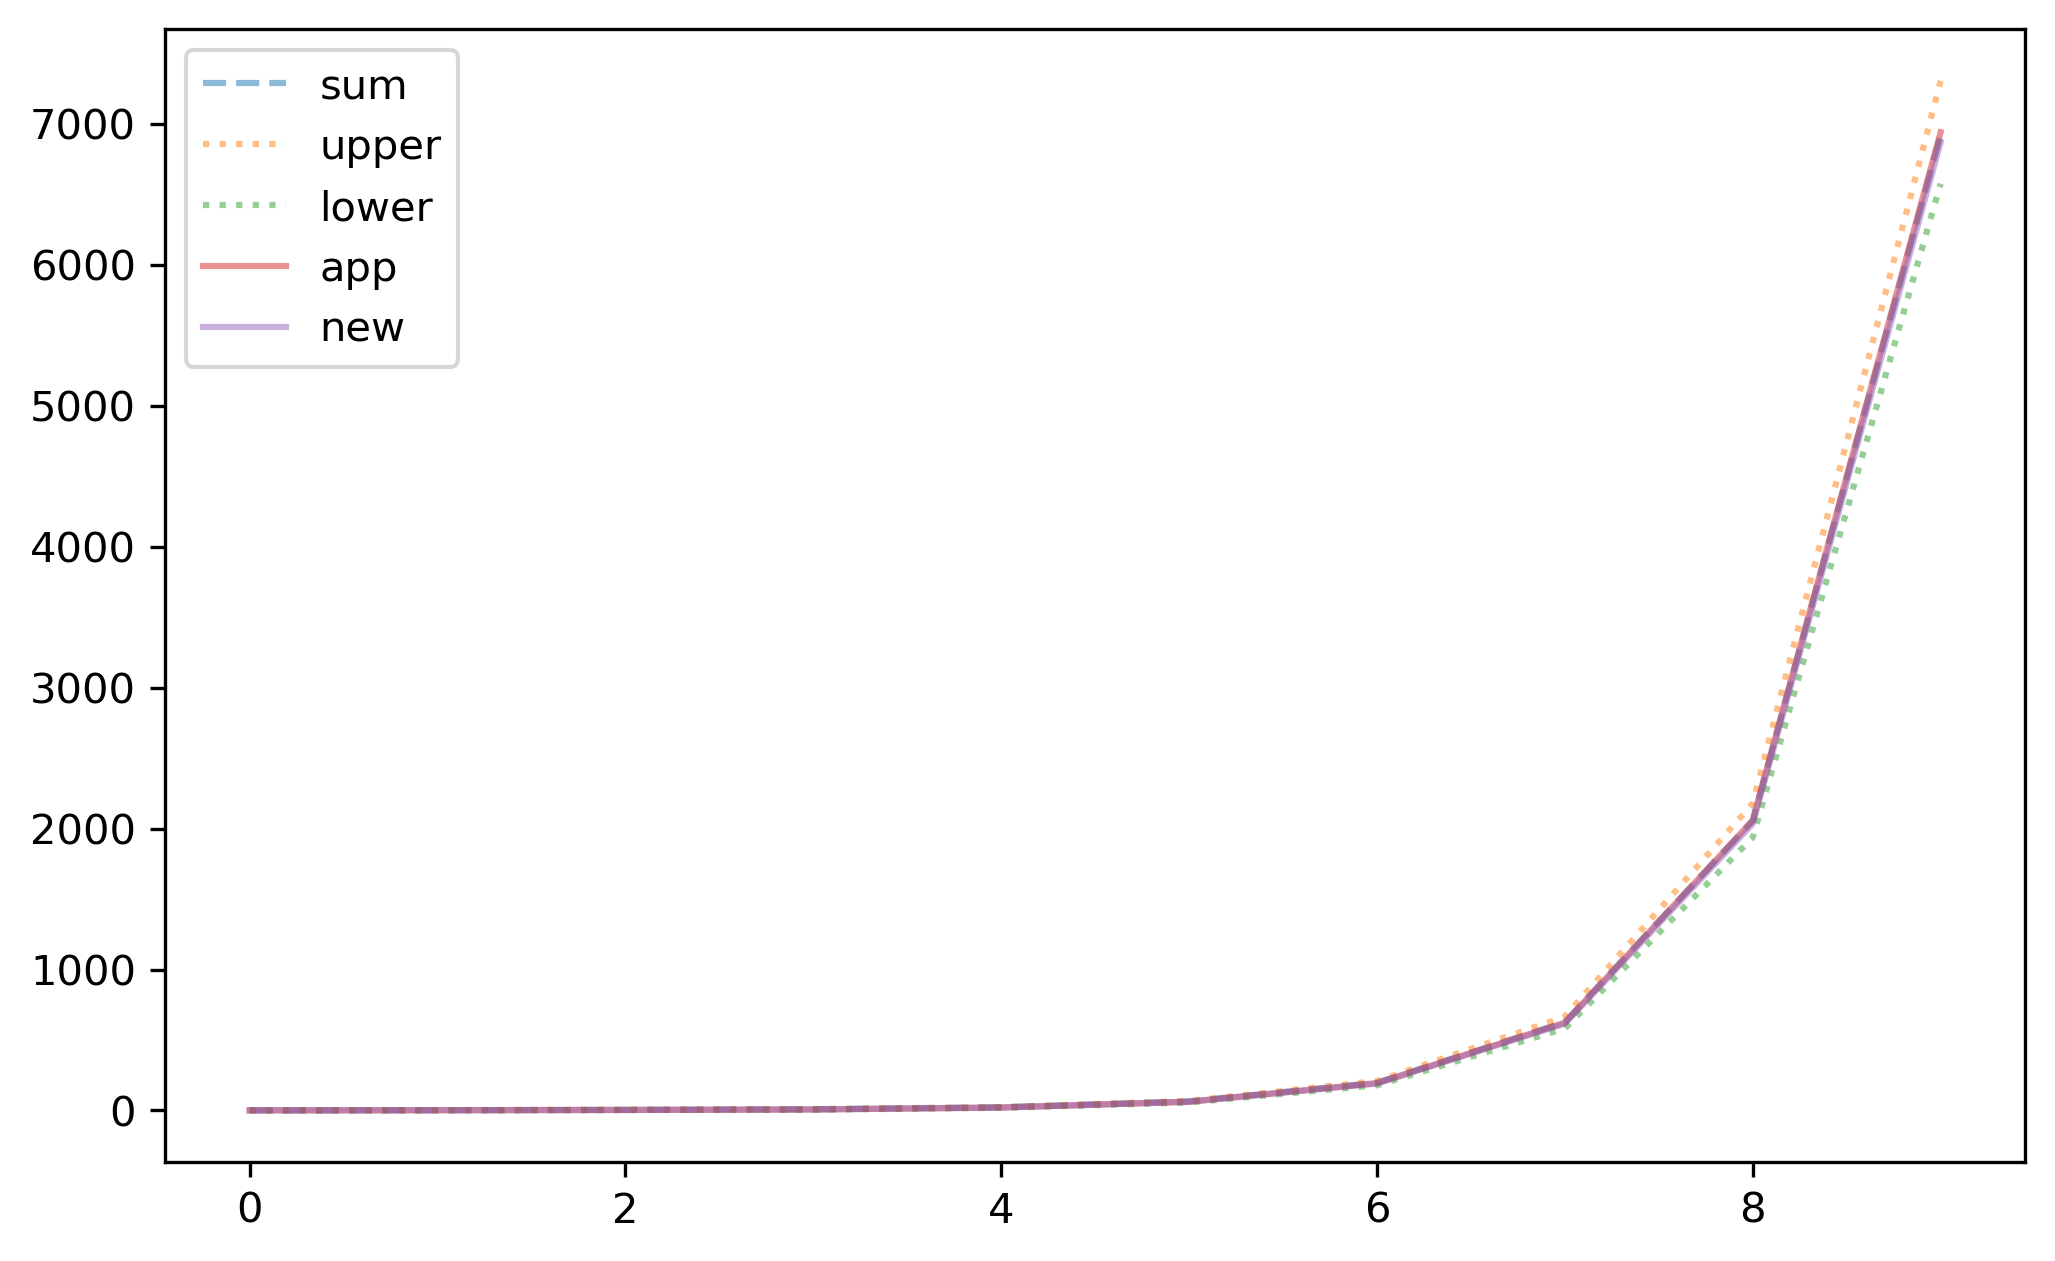


Difference:
 [0, 1, 2, 4, 9, 23, 65, 197, 626, 2056, 6918, 23714, 82500, 290512, 1033412, 3707852, 13402697, 48760367, 178405157, 656043857, 2423307047, 8987427467, 33453694487, 124936258127, 467995871777, 1757900019101, 6619846420553, 24987199492705, 94520750408709, 358268702159069, 1360510918810437, 5175497420902741, 19720133460129650, 75254198337177848, 287590328749420958, 1100534370899151722, 4216819865806452984, 16176618251666906476, 62127422576288648840, 238861285363295350240, 919286657093271150630, 3541413699369763259450, 13655332291007661393470, 52699762202912105352710, 203553241407997457013410, 786853361000994150101450, 3043971215078242223355170, 11784299926611415613401490, 45653073683802462499830980, 176980971925971827977822880] 


Catalan Numbers Factor:
 [0.25, 0.5, 0.625, 0.7, 0.75, 0.7857, 0.8125, 0.8333, 0.85, 0.8636, 0.875, 0.8846, 0.8929, 0.9, 0.9062, 0.9118, 0.9167, 0.9211, 0.925, 0.9286, 0.9318, 0.9348, 0.9375, 0.94, 0.9423, 0.9444, 0.9464, 0.9483, 0.95, 0.9516, 0.9

In [194]:
#approximations

#pow2_arr = [i**2 for i in range(n)]
#pow3_arr = [i**3 for i in range(n)]
#pow4_arr = [i**4 for i in range(n)]

exp2_arr = [2**i for i in range(n)]
exp3_arr = [3**i for i in range(n)]
exp4_arr = [4**i for i in range(n)]
#exp4_arr = [2**(2*i) for i in range(n)]

# Kevin Topley : Computationally Efficient Bounds for the Sum of Catalan Numbers
upper_arr = [floor(4**(i+1) / (3* i    * sqrt(pi*i))) if i > 2 else 2**i for i in range(n)]
lower_arr = [floor(4**(i+1) / (3*(i+1) * sqrt(pi*i))) if i > 2 else 2**i for i in range(n)]
ell_arr = [floor(4*catnum(i)/3) if i > 2 else 2**i for i in range(n)]
app_arr = [(upper_arr[i] + lower_arr[i]) // 2 for i in range(n)]
mu_arr =  [floor(4**(i+1) / ( (3*i + 1.5) * sqrt(pi*i))) if i > 2 else 2**i for i in range(n)]

#FP
new_arr =  [floor(4**(i+1) / (3*(i+1) * sqrt(pi*(i-0.7541)))) if i > 2 else 2**i for i in range(n)]

# Vaclav Kotesovec on A014138 Partial sums of Catalan numbers
#   equivalent to upper
vk_arr = [floor(2**(2*i+2) / (3 * sqrt(pi) * (i**(3/2)))) if i > 2 else 2**i for i in range(n)]

#Jack D'Aurizio on https://math.stackexchange.com/questions/903593/sum-of-catalan-numbers
ja_arr = [floor(20 * 4**i / (9 * i * sqrt(e * pi * i))) if i > 2 else 2**i for i in range(n)]

#print('\nlower:\n', lower_arr)
#print('\nSum:\n', sum_arr)
#print('\nNew:\n', new_arr)
#print('\napp:\n', app_arr)
#print('\nupper:\n', upper_arr)
#print('\n4**i:\n', exp4_arr)

k=15   #equal or less than n
plt.figure(figsize=(8,5), dpi=300)
plt.plot(range(k), [0 for _ in range(k)], alpha=0.5, ls='--', label='exact')
plt.plot(range(k), [(x - v) for x, v in zip(exp2_arr[:k], sum_arr[:k])], alpha=0.5, label='2^n dif')
plt.plot(range(k), [(x - v) for x, v in zip(exp3_arr[:k], sum_arr[:k])], alpha=0.5, label='3^n dif')
plt.plot(range(k), [(x - v) for x, v in zip(upper_arr[:k], sum_arr[:k])], alpha=0.5, ls=':', label='upper dif')
plt.plot(range(k), [(x - v) for x, v in zip(lower_arr[:k], sum_arr[:k])], alpha=0.5, ls=':', label='lower dif')
plt.legend()
plt.show()

k=18
plt.figure(figsize=(8,5), dpi=300)
plt.plot(range(k), [1 for _ in range(k)], alpha=0.5, ls='--', label='exact')
plt.plot(range(k), [(x / v) for x, v in zip(exp2_arr[:k], sum_arr[:k])], alpha=0.3, label='2^n ratio')
plt.plot(range(k), [(x / v) for x, v in zip(exp3_arr[:k], sum_arr[:k])], alpha=0.5, label='3^n ratio')
plt.plot(range(k), [(x / v) for x, v in zip(upper_arr[:k], sum_arr[:k])], alpha=0.5, ls=':', label='upper ratio')
plt.plot(range(k), [(x / v) for x, v in zip(lower_arr[:k], sum_arr[:k])], alpha=0.5, ls=':', label='lower ratio')
plt.legend()
plt.show()

k=20   #equal or less than n
plt.figure(figsize=(8,5), dpi=300)
plt.plot(range(k), [0 for _ in range(k)], alpha=0.5, ls='--', label='exact')
plt.plot(range(k), [(x - v) for x, v in zip(upper_arr[:k], sum_arr[:k])], alpha=0.3, ls=':', label='upper dif')
plt.plot(range(k), [(x - v) for x, v in zip(lower_arr[:k], sum_arr[:k])], alpha=0.5, ls=':', label='lower dif')
plt.plot(range(k), [(x - v) for x, v in zip(ell_arr[:k], sum_arr[:k])], alpha=0.5, ls='--', label='ell dif')
#plt.plot(range(k), [(x - v) for x, v in zip(vk_arr[:k], sum_arr[:k])], alpha=0.5,  label='vk dif')
plt.plot(range(k), [(x - v) for x, v in zip(ja_arr[:k], sum_arr[:k])], alpha=0.5,  label='ja dif')
plt.legend()
plt.show()

j=4
k=n
plt.figure(figsize=(8,5), dpi=300)
plt.plot(range(j,k), [1 for _ in range(j,k)], alpha=0.5, ls='--', label='exact')
plt.plot(range(j,k), [(x / v) for x, v in zip(upper_arr[j:k], sum_arr[j:k])], alpha=0.3, ls=':', label='upper ratio')
plt.plot(range(j,k), [(x / v) for x, v in zip(lower_arr[j:k], sum_arr[j:k])], alpha=0.5, ls=':', label='lower ratio')
plt.plot(range(j,k), [(x / v) for x, v in zip(ell_arr[j:k], sum_arr[j:k])], alpha=0.5, ls='--', label='ell ratio')
#plt.plot(range(j,k), [(x / v) for x, v in zip(vk_arr[j:k], sum_arr[j:k])], alpha=0.5,  label='vk ratio')  #equiv upper
plt.plot(range(j,k), [(x / v) for x, v in zip(ja_arr[j:k], sum_arr[j:k])], alpha=0.5,  label='ja ratio')
plt.legend()
plt.show()


#plt.plot(range(n), [cat_arr[i] - sum_arr[i] for i in range(len(sum_arr))], label='cat dif')
#plt.plot(range(n-1), [cat_arr[i+1]/3 - sum_arr[i] for i in range(len(sum_arr)-1)], label='cat1 dif')
#plt.plot(range(n-1), [cat_arr[i+1]/cat_arr[i] - sum_arr[i] for i in range(len(sum_arr)-1)], label='cat1* dif')

k=30
plt.figure(figsize=(8,5), dpi=300)
plt.plot(range(k), [0 for _ in range(k)], alpha=0.5, ls='--', label='exact')
plt.plot(range(k), [(x - v) for x, v in zip(upper_arr[:k], sum_arr[:k])], alpha=0.3, ls=':', label='upper dif')
plt.plot(range(k), [(x - v) for x, v in zip(lower_arr[:k], sum_arr[:k])], alpha=0.5, ls=':', label='lower dif')
plt.plot(range(k), [(x - v) for x, v in zip(app_arr[:k], sum_arr[:k])], alpha=0.5, ls='-.', label='app dif')
plt.plot(range(k), [(x - v) for x, v in zip(mu_arr[:k], sum_arr[:k])], alpha=0.5, ls='-', label='mu dif')
plt.plot(range(k), [(x - v) for x, v in zip(new_arr[:k], sum_arr[:k])], alpha=0.5, ls='-.', label='new dif')
plt.legend()
#plt.yscale('log')
plt.show()

j=10
k=n
plt.figure(figsize=(8,5), dpi=300)
plt.plot(range(j,k), [1 for _ in range(j,k)], alpha=0.5, ls='--', label='exact')
plt.plot(range(j,k), [x / v for x, v in zip(upper_arr[j:k], sum_arr[j:k])], alpha=0.5, ls=':', label='upper ratio')
plt.plot(range(j,k), [x / v for x, v in zip(lower_arr[j:k], sum_arr[j:k])], alpha=0.5, ls=':', label='lower ratio')
plt.plot(range(j,k), [x / v for x, v in zip(app_arr[j:k], sum_arr[j:k])], alpha=0.5, ls='-.', label='app ratio')
plt.plot(range(j,k), [x / v for x, v in zip(mu_arr[j:k], sum_arr[j:k])], alpha=0.5, ls='-', label='mu ratio')
plt.plot(range(j,k), [x / v for x, v in zip(new_arr[j:k], sum_arr[j:k])], alpha=0.5, ls='-.', label='new ratio')
plt.legend()
#plt.yscale('log')
plt.show()

k=10
plt.figure(figsize=(8,5), dpi=300)
plt.plot(range(k), sum_arr[:k], alpha=0.5, ls='--', label='sum')
plt.plot(range(k), upper_arr[:k], alpha=0.5, ls=':', label='upper')
plt.plot(range(k), lower_arr[:k], alpha=0.5, ls=':', label='lower')
plt.plot(range(k), app_arr[:k], alpha=0.5, label='app')
plt.plot(range(k), new_arr[:k], alpha=0.5, label='new')
plt.legend()
#plt.yscale('log')
plt.show()

#n=200

cat_arr = [catnum(i) for i in range(n)]
sum_arr = list(acc(cat_arr))
exp_arr = [4**i for i in range(n)]

dif_arr = [s-c for (c, s) in zip(cat_arr, sum_arr)]

print('\nDifference:\n', dif_arr, '\n')

cat_factor_arr = [round(cat_arr[i]/cat_arr[i-1]/4,4) for i in range(1,n)]
sum_factor_arr = [round(sum_arr[i]/sum_arr[i-1]/4,4) for i in range(1,n)]

print('\nCatalan Numbers Factor:\n', cat_factor_arr)
print('\nCatalan Sum Factor:\n', sum_factor_arr, '\n')



## Cyclical Behaviors

In [7]:
from math import inf

val_arr = [3,5, inf]
s = sum(val_arr)
acc_arr = list(acc(val_arr))
print(val_arr)
print(acc_arr)
print(s)
for x in range(0,20):
    print(next(j for j,v in enumerate(acc_arr) if x%s < v))

print('----')
val_arr = [3,5]
s = sum(val_arr)
acc_arr = list(acc(val_arr))
print(val_arr)
print(acc_arr)
print(s)
for x in range(25):
    print(next(j for j,v in enumerate(acc_arr) if x%s < v ))
    

[3, 5, inf]
[3, 8, inf]
inf
0
0
0
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
----
[3, 5]
[3, 8]
8
0
0
0
1
1
1
1
1
0
0
0
1
1
1
1
1
0
0
0
1
1
1
1
1
0
